<a href="https://colab.research.google.com/github/samarth0174/Face-Recognition-pca-svm/blob/master/Facial_Recognition(Soln).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In this project we implement the Identification system using Machine Learning concepts such as Principal Component Analysis (PCA) and Support Vector Machine (SVM).**
## Steps Involved:
- Importing Libraries
- Loading the Dataset
- Data Exploration
- Splitting the dataset 
- Compute PCA(eigen faces) 
- Train a SVM classification model
- * Using GridSearch to find best Parameters
- Model Evaluation
- Conclusion

## **Importing Libraries**
* We need to first import the scikit-learn library for using the PCA function API that is provided into this library.
* The scikit-learn library also provided an API to fetch  **LFW_peoples dataset**. 
* We also required matplotlib to plot faces.

In [0]:
#downnlading datasets sklearn
from sklearn.datasets import fetch_lfw_people

# Import matplotlib library 
import matplotlib.pyplot as plt 

# Import scikit-learn library 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.datasets import fetch_lfw_people 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 

import numpy as np 


## **Loading the dataset**

In [3]:
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people('data', min_faces_per_person=70, resize=0.4)

In [6]:
# introspect the images arrays to find the shapes (for plotting)
#todo:check shape

# introspect the images arrays to find the shapes (for plotting) 
n_samples, h, w = lfw_people.images.shape 

# Instead of providing 2D data, X has data already in the form of a vector that 
# is required in this approach. 


# for machine learning we use the data directly (as relative pixel
# position info is ignored by this model)
X = lfw_people.data 
n_features = X.shape[1] 

## the label to predict is the id of the person 
y = lfw_people.target 
target_names = lfw_people.target_names 
n_classes = target_names.shape[0] 

# Print Details about dataset 
print("Number of Data Samples: % d" % n_samples) 
print("Size of a data sample: % d" % n_features) 
print("Number of Class Labels: % d" % n_classes) 


Number of Data Samples:  1288
Size of a data sample:  1850
Number of Class Labels:  7


''

## **Data Exploration**

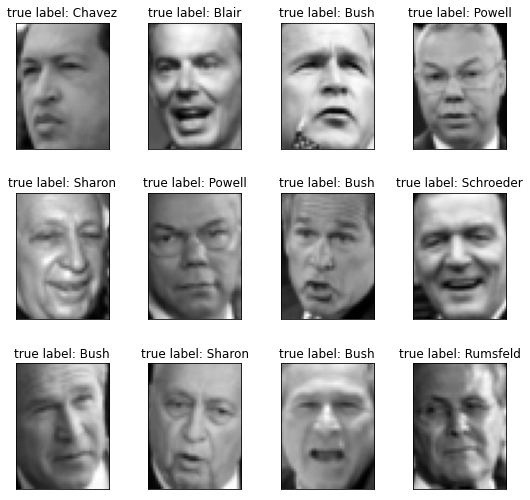

In [5]:
# plot and explore images and their respective classes
# hint: use matplotlib
# Function to plot images in 3 * 4 
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4): 
	plt.figure(figsize =(1.8 * n_col, 2.4 * n_row)) 
	plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35) 
	for i in range(n_row * n_col): 
		plt.subplot(n_row, n_col, i + 1) 
		plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray) 
		plt.title(titles[i], size = 12) 
		plt.xticks(()) 
		plt.yticks(()) 

# Generate true labels above the images 
def true_title(Y, target_names, i): 
	true_name = target_names[Y[i]].rsplit(' ', 1)[-1] 
	return 'true label: % s' % (true_name) 

true_titles = [true_title(y, target_names, i) 
					for i in range(y.shape[0])] 
plot_gallery(X, true_titles, h, w) 


## **Splitting the dataset**

In [7]:
#use sklearn test-train split
X_train, X_test, y_train, y_test = train_test_split( 
	X, y, test_size = 0.25, random_state = 42) 
print("size of training Data is % d and Testing Data is % d" %( 
		y_train.shape[0], y_test.shape[0])) 


size of training Data is  966 and Testing Data is  322


## **Compute PCA**
We can now compute a PCA (eigenfaces) on the face dataset (treated as unlabeled dataset): unsupervised feature extraction / dimensionality reduction.

In [11]:
from time import time
n_components = 300

print( "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]) )
t0 = time()

# TODO: Create an instance of PCA, initializing with n_components=n_components and whiten=True
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')

#TODO: pass the training dataset (X_train) to pca's 'fit()' method
pca = pca.fit(X_train)


print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Projecting the input data on the eigenfaces orthonormal basis done in %0.3fs" % (time() - t0))

Extracting the top 300 eigenfaces from 966 faces
done in 0.416s
Projecting the input data on the eigenfaces orthonormal basis done in 0.035s


## **Train a SVM classification model**
Fit a SVM classifier to the training set.Use GridSearchCV to find a good set of parameters for the classifier.

In [12]:
#todo : SVM with Gridsearch algo
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }

# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.001,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


## **Evaluation of the model quality on the test set**

In [13]:
#TODO: Test the model and Generate a classification report
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.59      0.77      0.67        13
     Colin Powell       0.74      0.92      0.82        60
  Donald Rumsfeld       0.84      0.59      0.70        27
    George W Bush       0.89      0.90      0.89       146
Gerhard Schroeder       0.89      0.68      0.77        25
      Hugo Chavez       0.80      0.53      0.64        15
       Tony Blair       0.82      0.78      0.80        36

         accuracy                           0.83       322
        macro avg       0.80      0.74      0.76       322
     weighted avg       0.83      0.83      0.82       322



In [14]:
#Confusion matrix
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


[[ 10   1   1   1   0   0   0]
 [  1  55   1   2   0   1   0]
 [  2   3  16   5   0   0   1]
 [  3   7   1 132   0   1   2]
 [  0   2   0   4  17   0   2]
 [  0   4   0   1   1   8   1]
 [  1   2   0   4   1   0  28]]


# **plot the eigen faces for your visualisation**

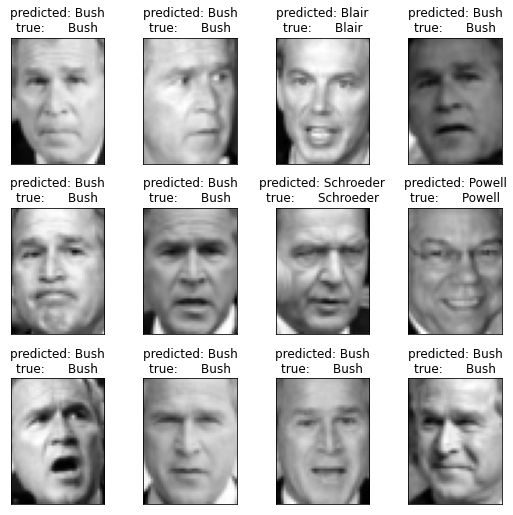

In [19]:
#TODO:plot most significant eigen faces
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())



# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return ('predicted: %s\ntrue:      %s' % (pred_name, true_name))

prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

plt.show()

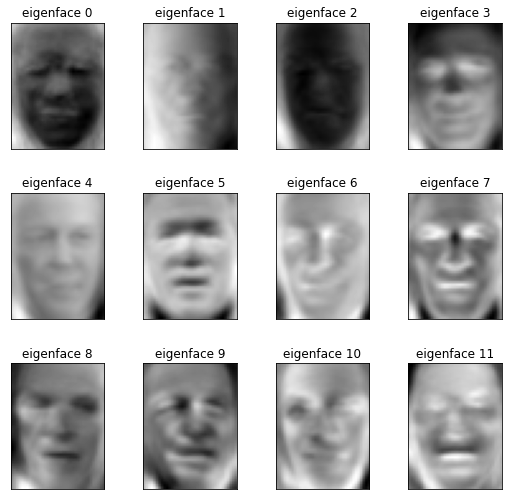

In [20]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

## **Conclusion**